# License Plate Detection
> Detecting license plate with an open source model

- toc: true 
- badges: true
- comments: true
- categories: [object detection]

### Install library

In [ ]:
!git clone https://github.com/quangnhat185/Plate_detect_and_recognize.git
%cd Plate_detect_and_recognize

### Import packages

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from local_utils import detect_lp
from os.path import splitext,basename
from keras.models import model_from_json
import glob

### Load model

In [3]:
def load_model(path):
  try:
    path = splitext(path)[0]
    with open('%s.json' % path, 'r') as json_file:
        model_json = json_file.read()
    model = model_from_json(model_json, custom_objects={})
    model.load_weights('%s.h5' % path)
    print("Loading model successfully...")
    return model
  except Exception as e:
    print(e)

In [ ]:
wpod_net_path = "wpod-net.json"
wpod_net = load_model(wpod_net_path)

### Data loading and preprocessing

In [5]:
def preprocess_image(image_path,resize=False):
  img = cv2.imread(image_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = img / 255
  if resize:
    img = cv2.resize(img, (224,224))
  return img

In [7]:
#hide_input
!mkdir /content/plates
!wget -q -O /content/plates/plate1.jpg 'https://images.squarespace-cdn.com/content/v1/5c981f3d0fb4450001fdde5d/1563727260863-E9JQC4UVO8IYCE6P19BO/ke17ZwdGBToddI8pDm48kDHPSfPanjkWqhH6pl6g5ph7gQa3H78H3Y0txjaiv_0fDoOvxcdMmMKkDsyUqMSsMWxHk725yiiHCCLfrh8O1z4YTzHvnKhyp6Da-NYroOW3ZGjoBKy3azqku80C789l0mwONMR1ELp49Lyc52iWr5dNb1QJw9casjKdtTg1_-y4jz4ptJBmI9gQmbjSQnNGng/cars+1.jpg'
!wget -q -O /content/plates/plate2.jpg 'https://www.cars24.com/blog/wp-content/uploads/2018/12/High-Security-Registration-Plates-Feature-Cars24.com_.png'

Create a list of image paths 

In [ ]:
image_paths = glob.glob("/content/plates/*.jpg")
print("Found %i images..."%(len(image_paths)))

Visualize data in subplot 

Found 2 images...


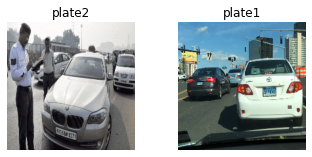

In [8]:
#collapse-hide
fig = plt.figure(figsize=(12,8))
cols = 5
rows = 4
fig_list = []
for i in range(len(image_paths)):
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(image_paths[i]))[0]
    fig_list[-1].set_title(title)
    img = preprocess_image(image_paths[i],True)
    plt.axis(False)
    plt.imshow(img)

plt.tight_layout(True)
plt.show()

### Inference

Forward image through model and return plate's image and coordinates. if error "No Licensese plate is founded!" pop up, try to adjust Dmin.

In [10]:
def get_plate(image_path, Dmax=608, Dmin=256):
    vehicle = preprocess_image(image_path)
    ratio = float(max(vehicle.shape[:2])) / min(vehicle.shape[:2])
    side = int(ratio * Dmin)
    bound_dim = min(side, Dmax)
    _ , LpImg, _, cor = detect_lp(wpod_net, vehicle, bound_dim, lp_threshold=0.5)
    return LpImg, cor

Obtain plate image and its coordinates from an image

In [11]:
#collapse-output
test_image = image_paths[0]
LpImg,cor = get_plate(test_image)
print("Detect %i plate(s) in"%len(LpImg),splitext(basename(test_image))[0])
print("Coordinate of plate(s) in image: \n", cor)

Detect 1 plate(s) in plate2
Coordinate of plate(s) in image: 
 [array([[298.04423448, 433.05399526, 436.51161569, 301.50185491],
       [338.43327592, 359.12640589, 385.37416506, 364.6810351 ],
       [  1.        ,   1.        ,   1.        ,   1.        ]])]


Visualize our result

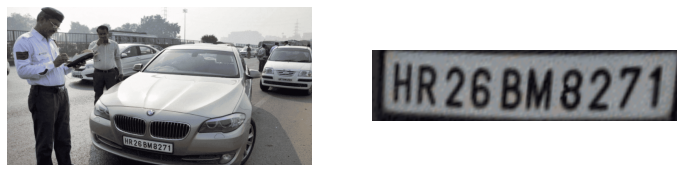

In [12]:
#collapse-hide
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.axis(False)
plt.imshow(preprocess_image(test_image))
plt.subplot(1,2,2)
plt.axis(False)
plt.imshow(LpImg[0])

Viualize all obtained plate images 

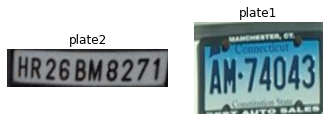

In [13]:
#collapse-hide
fig = plt.figure(figsize=(12,6))
cols = 5
rows = 4
fig_list = []

for i in range(len(image_paths)):
    fig_list.append(fig.add_subplot(rows,cols,i+1))
    title = splitext(basename(image_paths[i]))[0]
    fig_list[-1].set_title(title)
    LpImg,_ = get_plate(image_paths[i])
    plt.axis(False)
    plt.imshow(LpImg[0])

plt.tight_layout(True)
plt.show()